# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage,cophenet
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

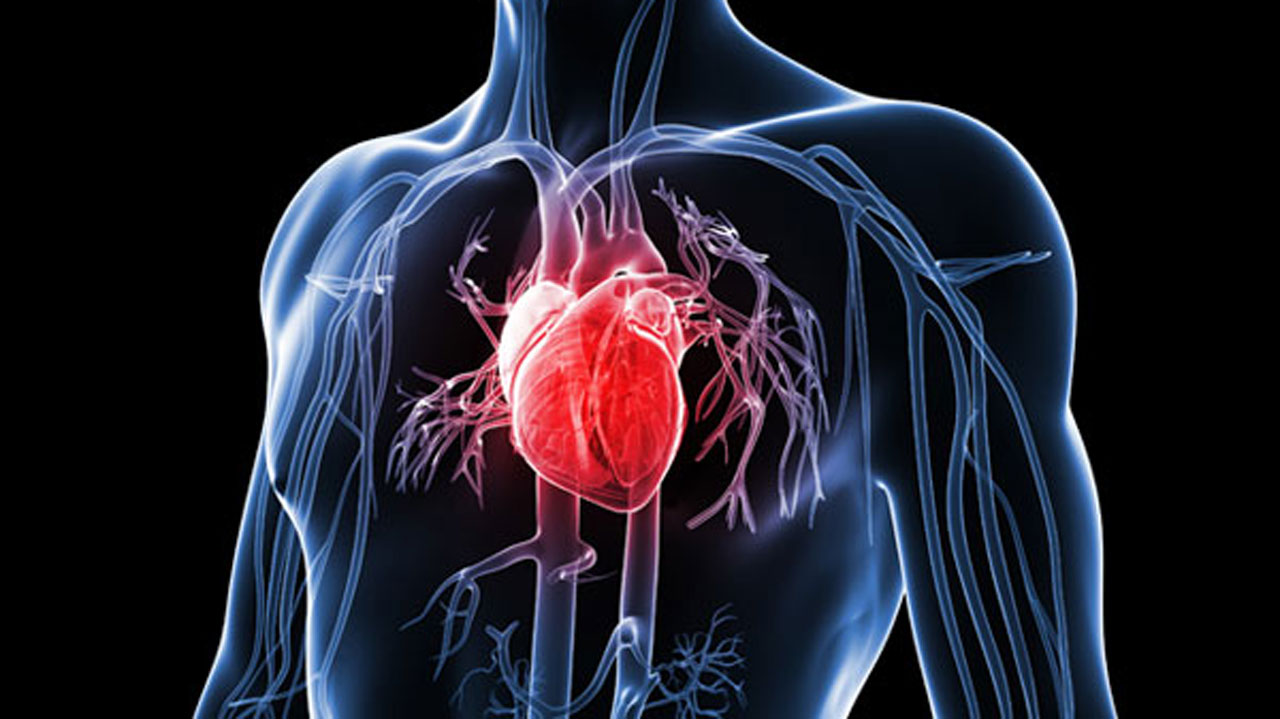

## Loading the Data

In [ ]:
%%time
df=pd.read_csv('../input/heart-disease-uci/heart.csv')
df.head()

## Checking the info

In [ ]:
df.info()

## Seeing the Summary

In [ ]:
df.describe()

## Checking the null values:

In [ ]:
df.isna().sum()/len(df)*100

In [ ]:
## Therefore there are no null values present in the dataset:

## Checking the correlation matrix:

In [ ]:
heat=np.abs(df.corr().loc['target']).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(heat.to_frame(),annot=True,cmap='Reds_r')
plt.show()

***From above we can see that exang,cp,oldpeak,thalach are strongle correlated with the target variable***

## Checking for Outliers:

In [ ]:
for i in df.columns[:-1]:
    sns.boxplot(df[i],palette='Reds')
    plt.show()

## Facet Grid

In [ ]:
a=sns.FacetGrid(df,col='target')
a.map(sns.boxplot,'age',color='red',order=['0','1'])

b=sns.FacetGrid(df,col='target')
b.map(sns.boxplot,'cp',color='orange',order=['0','1'])

c=sns.FacetGrid(df,col='target')
c.map(sns.boxplot,'thalach',color='magenta',order=['0','1'])

d=sns.FacetGrid(df,col='target')
d.map(sns.boxplot,'exang',color='pink',order=['0','1'])

e=sns.FacetGrid(df,col='target')
e.map(sns.boxplot,'oldpeak',color='blue',order=['0','1'])

f=sns.FacetGrid(df,col='target')
f.map(sns.boxplot,'slope',color='green',order=['0','1'])

plt.show()

## Performing Statistical tests

In [ ]:
from scipy.stats import ttest_ind,mannwhitneyu

In [ ]:
df0=df[df['target']==0]
df1=df[df['target']==1]

In [ ]:
for i in df.columns[:-1]:
    tstats,pvalue=ttest_ind(df0[i],df1[i])
    if pvalue<0.01:
        print(i,pvalue)

***These are the features we would be using***

In [ ]:
sns.pairplot(df,vars=['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal'],hue='target',palette='husl',diag_kws={'bw': 0.2})
plt.show()

## Splitting X and Y:

In [ ]:
X=df[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']]

In [ ]:
Y=df['target']

## Scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
num_sc=sc.fit_transform(X)
num_sc=pd.DataFrame(num_sc,columns=X.columns)
num_sc

In [ ]:
range(1,11)

In [ ]:
np.arange(1,11)

## Plotting for Inertia vs n_clusters:

In [ ]:
inertia=[]
for n in range(1,11):
    km=KMeans(n_clusters=n)
    km.fit(X)
    inertia.append(km.inertia_)
plt.plot(np.arange(1,11),inertia,color='magenta')
plt.xlabel('potential_clusters')
plt.ylabel('Inertia')
plt.show()

***Therefore there could be a potential of 3 clusters in the dataset i.e Person with heart disease,Person without Heart disease and person with onset of Disease***

In [ ]:
KM=KMeans(n_clusters=3,n_init=15,random_state=48)
KM.fit(num_sc)

In [ ]:
KM.inertia_

In [ ]:
KM.labels_

In [ ]:
KM.cluster_centers_

In [ ]:
centroids=KM.cluster_centers_
centroid_df=pd.DataFrame(centroids,columns=num_sc.columns)
centroid_df

## Plotting ScatterPlot:

In [ ]:
plt.scatter(num_sc.iloc[:,0],num_sc.iloc[:,1],c=KM.labels_,cmap=plt.cm.Accent)
plt.xlabel('age')
plt.ylabel('sex')
plt.show()

In [ ]:
plt.scatter(num_sc.iloc[:,1],num_sc.iloc[:,2],c=KM.labels_,cmap=plt.cm.Accent)
plt.xlabel('sex')
plt.ylabel('cp')
plt.show()

In [ ]:
plt.scatter(num_sc.iloc[:,2],num_sc.iloc[:,3],c=KM.labels_,cmap=plt.cm.Dark2_r)
plt.xlabel('cp')
plt.ylabel('thalach')
plt.show()

In [ ]:
plt.scatter(num_sc.iloc[:,3],num_sc.iloc[:,4],c=KM.labels_,cmap=plt.cm.Accent)
plt.xlabel('thalach')
plt.ylabel('exang')
plt.show()

In [ ]:
plt.scatter(num_sc.iloc[:,4],num_sc.iloc[:,5],c=KM.labels_,cmap=plt.cm.magma)
plt.xlabel('exang')
plt.ylabel('oldpeak')
plt.show()

In [ ]:
plt.scatter(num_sc.iloc[:,5],num_sc.iloc[:,6],c=KM.labels_,cmap=plt.cm.magma)
plt.xlabel('OLDPEAK')
plt.ylabel('SLOPE')
plt.show()

## AGC

In [ ]:
z=linkage(num_sc,'single')
c,coph_dists=cophenet(z,pdist(num_sc))

In [ ]:
c

In [ ]:
z=linkage(num_sc,'average')
c,coph_dists=cophenet(z,pdist(num_sc))

In [ ]:
c

In [ ]:
z=linkage(num_sc,'complete')
c,coph_dists=cophenet(z,pdist(num_sc))

In [ ]:
c

In [ ]:
z=linkage(num_sc,'ward')
c,coph_dists=cophenet(z,pdist(num_sc))

In [ ]:
c

**Average linkage is giving the best results**

In [ ]:
agc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agc.fit(num_sc)

In [ ]:
agc.labels_

In [ ]:
plt.scatter(num_sc.iloc[:,0],num_sc.iloc[:,1],c=agc.labels_,cmap=plt.cm.Set1_r)
plt.xlabel('age')
plt.ylabel('sex')
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
fig=plt.figure(1,figsize=(10,10))
ax=Axes3D(fig,elev=-150,azim=150)
ax.scatter(num_sc.iloc[:,0],num_sc.iloc[:,1],num_sc.iloc[:,2],c=agc.labels_,cmap=plt.cm.Set1,edgecolor='k',s=40)
ax.set_title('agc clusters with faeture space')
ax.set_xlabel('age')
ax.set_ylabel('sex')
ax.set_zlabel('cp')
plt.show()

In [ ]:
X_std_df_labeled = num_sc.copy(deep=True)
X_std_df_labeled['class'] = agc.labels_

In [ ]:
X_std_df_labeled

In [ ]:
Agc_clusters=X_std_df_labeled.groupby(['class'])

In [ ]:
df0=Agc_clusters.get_group(0)
df1=Agc_clusters.get_group(1)
df2=Agc_clusters.get_group(2)

In [ ]:
c0=np.array(df0.mean())
c1=np.array(df1.mean())
c2=np.array(df2.mean())

In [ ]:
c0=c0[:-1]

In [ ]:
c1=c1[:-1]

In [ ]:
c2=c2[:-1]

In [ ]:
agc_i0=0
agc_i1=0
agc_i2=0
for i in np.arange(df0.shape[0]):
    agc_i0=agc_i0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    agc_i1=agc_i1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    agc_i2=agc_i2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [ ]:
agc_i0+agc_i1+agc_i2

## Dendrogram:

In [ ]:
plt.figure(figsize=(10,10))
plt.title('AGC Dendrogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z=linkage(num_sc,'ward')
dendrogram(Z,leaf_rotation=90,leaf_font_size=10,truncate_mode='level',p=3,color_threshold=20)
plt.tight_layout()

## Silhouette Score

In [ ]:
from sklearn import metrics

In [ ]:
metrics.silhouette_score(num_sc,KM.labels_)

In [ ]:
metrics.silhouette_score(num_sc,agc.labels_)

***Agglomerative Clustering/KMeans Clustering is having a cluster quality score of 14 which implies that clusters within and between are not following Homogeneous and Heterogeneous pattern lets apply PCA for more better results***

## PCA:Principal component Analysis 

In [ ]:
cov_matrix=np.cov(num_sc.T)
cov_matrix.shape

In [ ]:
eig_values,eig_vec=np.linalg.eig(cov_matrix)

In [ ]:
eig_values

In [ ]:
eig_vec

In [ ]:
tot=sum(eig_values)
var_exp=[(i/tot)*100 for i in sorted(eig_values,reverse=True)]
var_exp

In [ ]:
cumsum=np.cumsum(var_exp)
cumsum

**Since Variance explained by each is of some extent therefore there is no multicollinearity in data**

In [ ]:
eig_pairs=[(np.abs(eig_values[i]),eig_vec[:,i]) for i in range(len(eig_values))]

In [ ]:
eig_pairs

In [ ]:
eig_pairs_sorted=sorted(eig_pairs,reverse=True)
eig_pairs_sorted

In [ ]:
eig_values_sorted=[eig_pairs_sorted[index][0] for index in range(len(eig_values))]
eig_vec_sorted=[eig_pairs_sorted[index][1] for index in range(len(eig_values))]

In [ ]:
eig_values_sorted

In [ ]:
eig_vec_sorted

In [ ]:
P_reduce=np.array(eig_vec_sorted[:2]).transpose()
P_reduce

In [ ]:
X_pca=np.dot(num_sc,P_reduce)
X_pca.shape

In [ ]:
pca=KMeans(n_clusters=3,n_init=15,random_state=48).fit(X_pca)

In [ ]:
pca.inertia_

In [ ]:
metrics.silhouette_score(X_pca,pca.labels_)

In [ ]:
plt.scatter(X_pca[:,0],X_pca[:,1],c=pca.labels_,cmap=plt.cm.Set1)
plt.show()

### Conclusion: Final cluster is showing homoegenoeus and heterogeneous pattern and a cluster quality score i.e silhoutte score of 41 which is acceptable.